# Table of contents
* [Project Description](Project-Description)
* [MDF Libraries Used in this Demonstration and Their Usage](#MDF-Libraries-Used-in-this-Demonstration-and-Their-Usage)
* [Standar workflow imports for MFD](#Standar-workflow-imports-for-MFD)
* [Generating a model container](#Generating-a-model-container)
* [Generating the model graph](#Generating-the-model-graph)
* [Linking the created model to graph](#Linking-the-created-model-to-graph)
* [Instanciating the first node and adding parameter values and I/O port(s)](#Instanciating-the-first-node-and-adding-parameter-values-and-I/O-port(s))
* [Instanciating second node and adding parameter values I/O port(s)](#Instanciating-second-node-and-adding-parameter-values-I/O-port(s))
* [Connecting node one input port sendernode to node two output port recipientnode](#Connecting-node-one-input-port-sendernode-to-node-two-output-port-recipientnode)
* [Instanciating the third node and adding parameter values I/O port(s)](#Instanciating-the-third-node-and-adding-parameter-values-I/O-port(s))
* [Connecting node two input port sender node to node three output port recipient node](#Connecting-node-two-input-port-sender-node-to-node-three-output-port-recipient-node)
* [Connecting node two input port sendernode to node three output port recipientnode](#Connecting-node-two-input-port-sender-node-to-node-three-output-port-recipient-node)
* [Setting conditions to nodes](#Setting-conditions-to-nodes)
* [Linking conditions to nodes](#Linking-conditions-to-nodes)
* [Graph visualization and image generation](#Graph-visualization-and-image-generation)
* [Intializing the graph evaluation and evaluating the graph parameters](#Intializing-the-graph-evaluation-and-evaluating-the-graph-parameters)
* [Generating indivual nodes evaluted output values](#Generating-indivual-nodes-evaluted-output-values)

## Project Description

This project is intended for the sole purpose of demonstrating my overall understanding of the ModECI MDF libraries. This project is presented as a contribution as part of the Outreachy open source and application requirement. The ModECI MDF libraries is an open source library that provide a set of tool intended for expressing computational models in a format that allows them to be exchanged across programming languages and different execution environment.

In this demonstration, a model, and a graph where created consisting of three nodes, each nodes were assigned to a condition and each condition had different activation critaria. For each of the instanciated node,  parameter identity and values were assigned to each node. In some cases, formulars were assigned to node(s) in form of parameters, having values and identity. In such cases, the parameters are passed into the nodes output ports which would connect the next nodes input port. This connection serves as link, enabling the flow of data from one node to the other. The input values are passed into the parameters which serve as the evaluable the mathematical expression.

Similar to the nodes, the graph and the model are instanciated. Following this, the instanciated graph is appended to the already instanciated node. After successful creation of all the node and assigning their parameter, output and input port, the the first and second node are liked via their output and input port. The number of node linking will depend of the amount of nodes created.

## MDF Libraries Used in this Demonstration and Their Usage

**EvaluableGraph library**

The `EvaluableGraph` library evaluates a  graph by making use of the execution engine. The evaluated graph consist of a node(s) linked together through edges. This library is imported from the modeci_mdf.execution_engine. One of the function from the Evalable graph used in this demonstration includes:

 * `evalate`:- This function is used to evalaute a full fledge graph having nodes and edges. It functions by evaluating the functions passed as parameter values. If input values exist, it factors then in and evaluates them to generate a final output values for each node.

**Image library**

This library coverts and mdf graph consisting of nodes, parameters, edge(s), input and output port(s) into an image of format `png` or `svg`. This made possibe and assisted by the Graphviz package. This library is used for the sole purpose of visualizing the full fledge graph with its nodes, edges, parameters, input and output values. Its helps to understand how the nodes and where the nodes are connected and by what edges between each nodes.The library is imported Ipython.display library. One of the function belonging to the image library used in the demonstration includes:

* `to_graph_image`:- This function is used for coverting MDF graphs into image of format type `png` or `svg`


**modeci_mdf.mdf library**

This library enables moodel, graph, node(s) instanciation. It also enables setting of parameter identity and values. With the use of build in functions from it's libraries, imput and output nodes can be set to the nodes instanciated. This is by far one of the most important libraries as without it, the creation of graph, model and node(s) object will not be possible. In this demonstration, functions used include:

* `Model`:- This instanciates a model which contains graph(s) objects and attribute parameters.

* `Graph`:- This acts as a container for the node(s) created, its parameters, their edges, and condtions. Without the graph, the simple_connect function cannot perform as it takes the generated graph as an arguement. It aid the linking of node through their edges which is made possible through the interconnectedness of output(s) and input port(s).

* `Node`:- The node is also a very important function. The node function is responsible for the creation of node objects. It serves as a store and at the same time as a link to another data point or node instance where it transfers data to. The node recieves parameters and parameter values through input and output port(s). This aids transfer of data from one node to the other.


**Graph_scheduler**
This module is use to link the generated node to an activation critaria. In other words, its used for setting node activation critaria. It determines when or when not for a node to run. One of the function used from this library in this demonstration includes:

* `ConditionSet`:- This function provides specific conditions which has to be met for node execution.

**modeci_mdf.utils**

This is an extremely useful library, it contains useful utility function capable of handling various MDF objects. One of the function belonging to this library used in this demonstration includes:

* `simple_connect`:- This is Used for creating an edge that connnects two input and output port of to or more nodes together and into a graph.



## Standar workflow imports for MFD

1. **Import 1**: This import searches the `modeci_mdf.mdf` and imports all the modules within the library via the use of the wildcard notation.

2. **Import 2**: This import searches the `modeci_mdf.execution_engine` library and imports the `EvaluableGraph` library.

3. **Import 3**: This import searches the `modeci_mdf.utils` library and imports the `simple_connect` function.

4. **Import 4**: The import searches the `Ipython.display` library and imports the `Image` function.


In [1]:
# Import 1
from modeci_mdf.mdf import *
# Import 2
from modeci_mdf.execution_engine import EvaluableGraph
# Import 3
from modeci_mdf.utils import simple_connect
# Import 4
from IPython.display import Image

##  Generating a model container

The function below generates a container that houses the graph(s) identity and its metadata, the metadata is passed as a dictionary object, although it is set to `None` by default. The Model object is created using `Model` function.

In [2]:
# Generating a model container
my_model = Model(id= "my_model")

## Generating the model graph

The module `Graph` servers as a container for generated nodes and it's elements such as parameter, node id, node metadata, output ports input ports e.t.c. 

In [3]:
# Model  with graph
my_model_graph = Graph(id= "my_graph")

## Linking the created model to graph
The graph will serve the purpose of forming edges which creates an intersection or linkage path known as edges between two or more inter-connected nodes. 

In [4]:
# linking the model to graph
my_model.graphs.append(my_model_graph)

## Instanciating the first node and adding parameter values and I/O port(s)

This module holds the the node identity, it's metadata. Using the `Parameter` module, parameter values such as parameter identity and values can be assigned to the node using the `Append` function. With the function `Input`, the nodes is provided an input port, it's identity and the input values. Similarly using function `Output`, provides the node an output port which recieves and hold the output identify and output value.

In [5]:
# Instanciating node one
node_one = Node(id= "radius_of_a_circle", metadata= {"color": "0 .9 0"})

# Adding parameter value(s) to node one instance.
node_one.parameters.append(Parameter(id= "area", value= 9))
node_one.parameters.append(Parameter(id= "pi", value= 3.14))
node_one.parameters.append(Parameter(id= "constant", value= 2))

# Radius of a circle evaluation equation function.
radius_of_a_circle_function = Parameter(id= "radius",
                          value= "area / (constant * pi)")

# Adding radius of a circle evaluation function to node
node_one.parameters.append(radius_of_a_circle_function)

# Adding output port to node one 
node_one.output_ports.append(OutputPort(id= "node_one_output",
                                        value= "radius"))

# Adding node one to instanciated graph
my_model_graph.nodes.append(node_one)

## Instanciating second node and adding parameter values I/O port(s)

In [6]:
# Instanciating node two.
node_two = Node(id="circumference_of_a_circle", metadata= {"color": "0 .7 0"})

# Adding node two input port.
node_two.input_ports.append(InputPort(id= "radius"))

# Adding parameter values to node two instance.
node_two.parameters.append(Parameter(id= "pi", value= 3.14))
node_two.parameters.append(Parameter(id= "constant", value= 2))

# Circumference of a circle evaluation equation function.
circumference_of_a_circle_function = Parameter(id= "circunference",
                                       value= "radius * constant * pi")

# Adding circumference of a circle evaluation function to node.
node_two.parameters.append(circumference_of_a_circle_function)

# Adding output port to node one.
node_two.output_ports.append(OutputPort(id= "node_two_output",
                                        value= "circunference"))

# Adding node two to instanciated graph.
my_model_graph.nodes.append(node_two)

## Connecting node one input port `sender node` to node two output port `recipient node`
This is achived with the use of the `Simple_connect` function, it sends id(s), parameter values, I/O identity and value(s) from node one `sender node` to node two `recipient node`. In other words, This aids in the interchange and sharing of data from the sendernode to the recipient node, i.e from the output node of one node to the imput of another. The graph aids in the creation of edges which creates an intersection or linkage between two connected nodes.

In [7]:
simple_connect(node_one, node_two, my_model_graph)

Edge(metadata=None, id='edge_radius_of_a_circle_circumference_of_a_circle', sender='radius_of_a_circle', receiver='circumference_of_a_circle', sender_port='node_one_output', receiver_port='radius', parameters=None)

## Instanciating the third node and adding parameter values I/O port(s)

In [8]:
# Instanciating node three.
node_three = Node(id="diameter_of_a_circle", metadata= {"color": "0 .4 0"})

# Adding parameter values to node three instance.
node_three.parameters.append(Parameter(id= "pi",
                                     value= 3.14))

# Diameter of a circle evaluation equation fuction.
diameter_of_a_circle_function = Parameter(id= "diameter",
                                         value= "circumference / pi")

# Adding diameter of a circle evaluation function to node.
node_three.parameters.append(diameter_of_a_circle_function)

# Adding node three output port.
node_three.output_ports.append(OutputPort(id= "node_three_output",
                                         value= "diameter"))
# Adding node three input port.
node_three.input_ports.append(InputPort(id= "circumference"))

# Adding node three to instanciated graph
my_model_graph.nodes.append(node_three)

## Connecting node two input port `sender node` to node three output port `recipient node`


In [9]:
simple_connect(node_two, node_three, my_model_graph)

Edge(metadata=None, id='edge_circumference_of_a_circle_diameter_of_a_circle', sender='circumference_of_a_circle', receiver='diameter_of_a_circle', sender_port='node_two_output', receiver_port='circumference', parameters=None)

In [10]:
# An overview of the structure of the model
print(my_model.to_yaml())

my_model:
    format: ModECI MDF v0.4
    generating_application: Python modeci-mdf v0.4.5
    graphs:
        my_graph:
            nodes:
                radius_of_a_circle:
                    metadata:
                        color: 0 .9 0
                    parameters:
                        area:
                            value: 9
                        pi:
                            value: 3.14
                        constant:
                            value: 2
                        radius:
                            value: area / (constant * pi)
                    output_ports:
                        node_one_output:
                            value: radius
                circumference_of_a_circle:
                    metadata:
                        color: 0 .7 0
                    input_ports:
                        radius: {}
                    parameters:
                        pi:
                            value: 3.14
                        constant

## Setting conditions to nodes
Conditions are set using the `Condition` function. Conditions are used in specifiying when nodes are allowed to execute. This is usually done by setting activation critaria for the various instanciated nodes.Their Activation types are important when setting node activation critaria. Normally the first node is independent and always assigned a static condition which always evaluates to true and as such the node activates always like the name type implies. Other nodes can be assigned conditions whose activations are dependent on the activation of other nodes usually the first, executing a specified number of times before it can be activated.

### Types of conditions supported by mdf
* Generic: This is satisfied when a user-specified function and set of arguments evaluates to `True`.
* Static: This is satisfied either always or never.
* Composite: This is satisfied based on one or more other Conditions.
* Time-based: This is satisfied based on the current count of units of time at a specified `TimeScale`
* Node-based: This is based on the execution or state of other node.
* Convenience: This is based on other Condition, condensed for convenience.

In [11]:
# Static condition to be assigned to node one
node_one_condition = Condition(type= 'Always')

# Node based condition
node_two_condition = Condition(type= 'AfterCall', dependencies= node_one.id, n= 2)

# Time based condition
node_three_condition = Condition(type= 'AfterPass', n=1)

## Linking conditions to nodes
This is done using the ConditionSet function. This is done by binding a specific node to a given condition type. The specifier is known as `node_specific`. Node and condition type are set by passing the node identity as the keys of the dictionary while contions are passed as dictionary value.

In [12]:
my_model_graph.conditions = ConditionSet(node_specific= {
    node_one.id : node_one_condition,
    node_two.id : node_two_condition,
    node_three.id : node_three_condition
})

# Saving our model structure
This give a birds eyes view of the models structure and its various component parameters, various nodes, input and output ports, thier correspondng ports and many more. Similar to giving a birds eye view, it also aids in saving of the models structure.

In [13]:
my_model.to_json_file("my_model.json")
my_model.to_yaml_file("my_model.yaml")

'my_model.yaml'

## Graph visualization and image generation
No data analysis library would be complete without appropriate visualization engine. The is necessary because it enables users of the graphs and model output to draw insigns and know what exactly is happening at a single glance of the visualization or image generated. To generate a visualization it is necessary to set the generation parameter using the `to_graph_image`. Using this, we can easily set the engine, the output_format, files save location and orientation of the image.

Converting MDF graph: my_graph to graphviz (level: 3, format: png)
    Node: radius_of_a_circle
    Node: circumference_of_a_circle
    Node: diameter_of_a_circle
    Edge: edge_radius_of_a_circle_circumference_of_a_circle connects radius_of_a_circle to circumference_of_a_circle
    Edge: edge_circumference_of_a_circle_diameter_of_a_circle connects circumference_of_a_circle to diameter_of_a_circle
Written graph image to: example.png


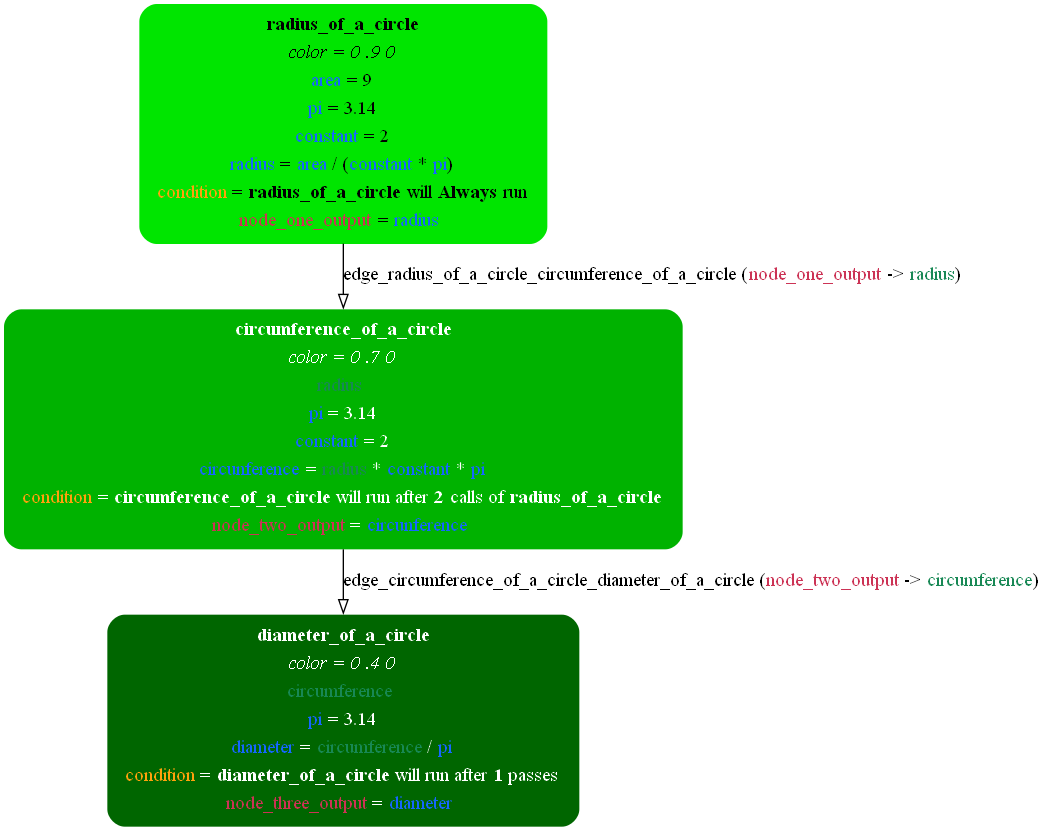

In [19]:
# Graph conversion
my_model.to_graph_image(engine= "dot",
                       output_format= "png",
                       view_on_render= False,
                       level= 3,
                       filename_root= "example",
                       is_horizontal= False,
                       solid_color= True)

# Graph visualisation
Image(filename= "example.png")

## Intializing the graph evaluation and evaluating the graph parameters
The gerated graph is passed into the function `EvaluableGraph`, The graph passed into the `EvaluableGraph` is evaluated using the `evaluate()` function.

In [20]:
# Graph evaluation
evaluated_graph = EvaluableGraph(my_model_graph, verbose= False)
evaluated_graph.evaluate()


Init graph: my_graph
Evaluating graph: my_graph, root nodes: ['radius_of_a_circle'], with array format numpy


## Generating indivual nodes evaluted output values
After evaluating the graph using the `EvaluableGraph`, the nodes withing the graphs will be evaluated individually, the
`EvaluableGraph` function will take into account the output and input values of individual nodes, their formulars and their parameter values processes it and generate concise and use output values.

In [21]:
# Viewing the evaluated output of node one.
print("Output of node one: {:.2f}".format(evaluated_graph.enodes["\
radius_of_a_circle"].evaluable_outputs["node_one_output"].curr_value))

Output of node one: 1.43


In [22]:
# Viewing the evaluated output of node two.
print("Output of node two: {:.2f}".format(evaluated_graph.enodes["\
circumference_of_a_circle"].evaluable_outputs["node_two_output"].curr_value))

Output of node two: 9.00


In [23]:
# Viewing the evaluated output of node three.
print("Output of node three: {:.2f}".format(evaluated_graph.enodes["\
diameter_of_a_circle"].evaluable_outputs["node_three_output"].curr_value))

Output of node three: 2.87


# Thank you